# MT642A exercise 5, spectroscopy 1 -Teacher

### Brief Theory
#### Photoelectron spectroscopy
When more energy is added to an electron than the ionization energy, $I_i$ of that electron in an atom it will form a photoelectron. Koopman's theory states that the ionization energy, $I_i$, is equal to the negative orbital energy of the ejected electron in the atom: $I_i = -\varepsilon_i$.

In photoelectron spectroscopy (PES) an electron is excited by EM radiation or another particle with the energy, $E = hc/\lambda = h\nu$. 

The way to detect the PE is by collecting and counting only those with a certain kinetic energy, $KE$, and then combing this with the previous formula for ionization energy. $h\nu = KE - I_i = KE + \varepsilon_i$. 

For experiments involving, bulk, surfaces or nano-wires, individual electron orbitals turns into bands. What PES will probe will instead be the electron density of states (DOS).

#### Surface sensitivity
Look at the figure below. Because the very short mean free path of electrons PES techniques are typically very surface sensitive. 
<img src="https://gitlab.com/knjakob-blomquist/mt642a/-/raw/main/universal_curve.png" alt="graph" width=500 >
<em>Universal curve of mean-free-path of electrons:</em>

#### 4 types of techniques
If the energy of the EM radiation is enough to eject a core electron from the atoms, a valence electron falls down to fill the electron hole generated by the primary electron being ejected. Due to conservation of energy there will be two main pathways for the atoms to take care of the excess energy:

1. Auger process: The excess energy is removed by ejecting a secondary electron from the valence band. KLL Auger peak represent electrons being ejected from the L shell after a primary K electron was ejected and the hole was replaced with another electron from the L shell. **AES** refers to Auger electron spectroscopy. 

2. Fluorescence: A photon is ejected, typically in the X-ray range. **XES** refers to X-ray emission spectroscopy.

**XPS**: refers to X-ray photoelectron spectroscopy and is the detection of the primary electrons ejected by  X-ray.

If the wavelength of the X-rays is varied and for every photon absorbed a primary or secondary electron is ejected and counted by a detector. This is called X-ray absorption spectroscopy or **XAS**. If A special class of this when the photon energy is varied just around the ionization energy of the electrons then the electrons will be excited into bound un-occupied states. The recorded spectra are called the Near-Edge X-ray Absorption Fine Structure, or NEXAFS for short.

XPS, AES, and XES technically don't need a synchrotron source, but XAS only work when you can vary the photon energy continuously and therefor typically needs a synchrotron source. 

### Task 1
What does HOMO and LUMO stand for?

#### Answer
Highest Occupied Molecular Orbital, HOMO, is the electronic state occupied with one or two electrons with highest energy. 

Lowest Unoccupied Molecular Orbital, LUMO, is the lowest electronic state that is not occupied with any electron. This is the state just over the HOMO.

Fermi-level is formally the position on the energy axis where the propability of electron occupacy is 0.5, and as such it sits between HOMO and LUMO.

### Task 2
Koopmans theory is only approximative as it doesn't take into account what happens after the photo-electron is removed from its orbital. Explain what that means and how one can expect to have to adjust the value on the ground state orbital energy compared to the experimental one.

#### Answer
Koopman's theorem states that in a closed-shell Hartree-Fock calculation the first ionization energy of a molecular system is equal to the negative of the orbital energy of the highest occupied molecular orbital (HOMO). In reality, the electron states changes slightly compared to the ground state. As the electron leaves the atom it experiences the potential of the positive ion instead of the potential of the neutral ground-state it was before. In essence it is a difference between initial-state (ground-state) and final-state orbitals, where the detected photo-electrons give information about the latter more than the former. 

In order to get calculations closer to experimental values it is possible to approximate a final-state by changing the charge of the atom and then perform the Hartree-Fock calculation again. There are today more advanced codes using excited-state methods to obtain a more accurate absolute value.

### Task 3
Photons with wavelength 58.43 nm eject electrons from the HOMO of N2 molecules with $KE$ = 5.63 eV.

* a) Convert wavelength to wavenumber (in cm⁻¹) and into eV.
* b) Electrons with $KE = 4.53$ eV were also detected in the same measurement. To what ionization energy does that correspond?

#### Answer
* a) 58.43 nm = 21.22 eV = 171.1 x 10³ cm⁻¹  (1 nm = 1239.84193 eV, X (cm⁻¹) = 1/Y(nm) x10⁷), 
* b) KE = PE - BE or BE = PE - KE = 21.22 eV - 4.53 eV =  16.69 eV. So Binding Energy (or Ionization energy) is 16.69 eV.

### Task 4
a) Explain and sketch the following methods: XPS, XAS, Auger Spectroscopy, XES

b) Explain which of those methods the energy of the outgoing radiation/electron isn't directly sensitive to the wavelength of the incoming radiation.

#### Answer
* a) See book.
* b) The Auger electron kinetic energy is only related to the specific relaxation process, that is the difference in the excited state of a core-hole after the initial photo-electron event, and the final state of the ejected Auger-electron and the a filled core-hole. This is also true for the X-ray emission spectroscopy as the process is the same as for Auger except it is a photon ejected instead of an electron.

### Molecular orbitals becoming bands
As PES often is used to analyze extended system it is important to understand the difference in the electron structure of a molecule vs that of a wire, surface, or bulk.

In the code below I make a set of (very crude!) density functional theory (dft) calculations of hydrogen atoms stacked into a longer and longer 1d-chain. The electrons are modeled using linear combinations of atomic orbitals (LCAO). I then use the energies of the electron orbitals and plot them in the form of bar graphs. As the chain grows longer the molecular orbitals of the 1s electrons turns more and more into a continuous band. For comparison I make a new calculation but this time using a single hydrogen atom in a unit cell with periodic boundary conditions and the electron is modeled as a plane wave. 

In [1]:
# Load libraries

%pylab inline

# we use ASE to create our wire
# and GPAW to solve the Kohn-Sham equations
# which is equivalent to solving the Schrodinger
# equation for the system
# https://wiki.fysik.dtu.dk/gpaw/index.html

from ase import Atoms
from gpaw import GPAW, LCAO, PW
from ase.visualize import view

Populating the interactive namespace from numpy and matplotlib


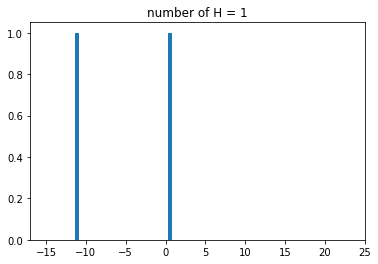

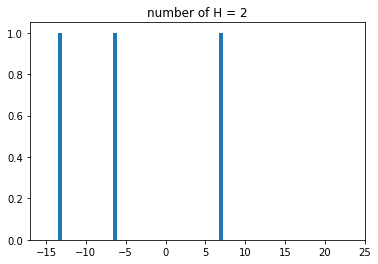

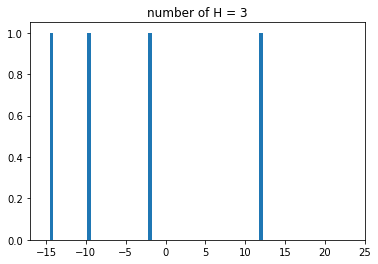

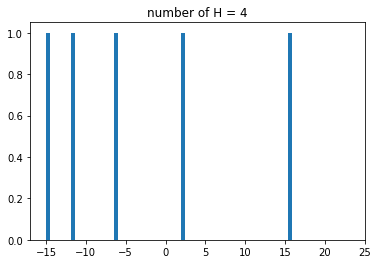

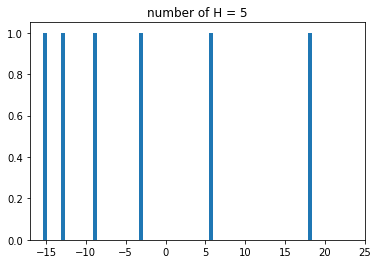

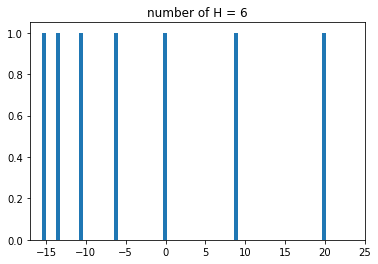

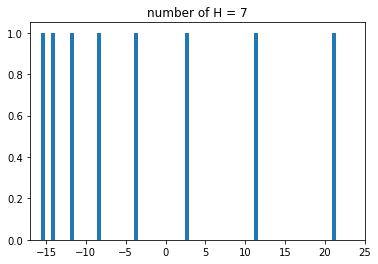

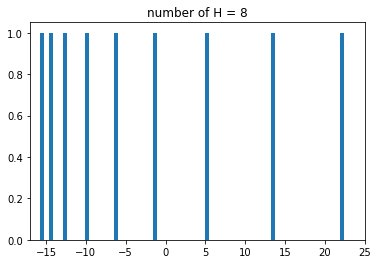

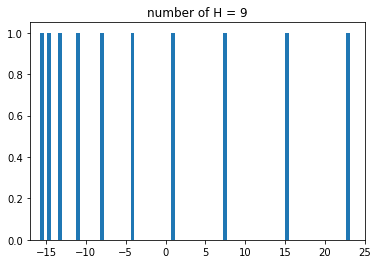

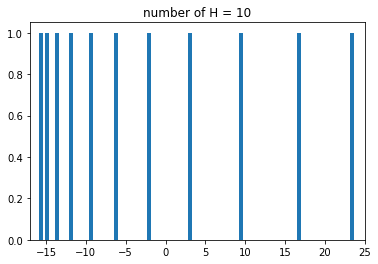

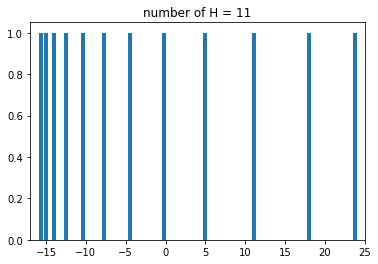

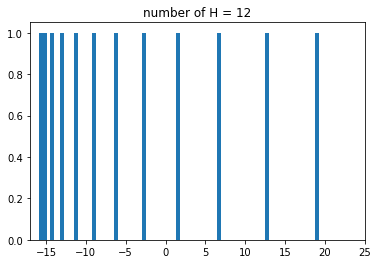

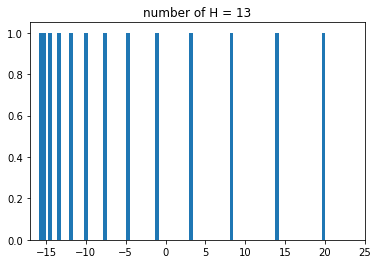

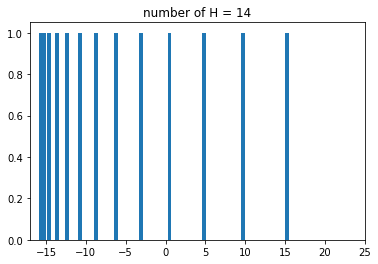

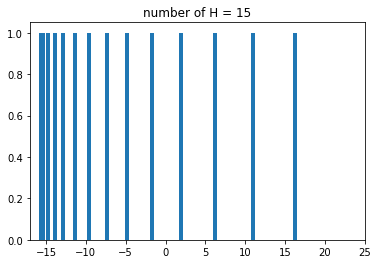

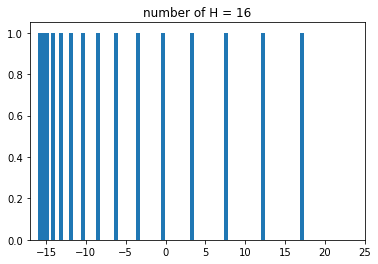

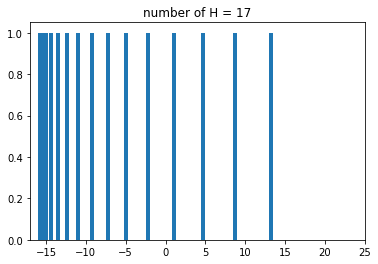

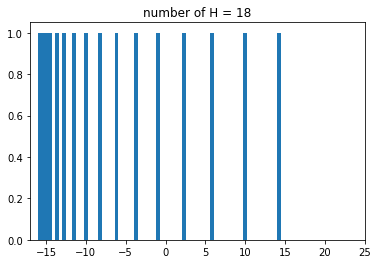

In [2]:
# Making a set of hydrogen molecules
# longer and longer. Electrons are modelled 
# using LCAO as basis set.

d = 0.9
h = Atoms('H', positions=[(0, 0, 0)],
          cell=(d, 0, 0))

E = []
eigenvalues = []
for i in arange(2, 20):
    hs = []
    hs = h.repeat((i,1,1))
    hs.center(vacuum=3.)
    calc = GPAW(mode='lcao',
               txt=None)
    hs.set_calculator(calc)
    E.append(hs.get_potential_energy())
    eigenvalues.append(calc.get_eigenvalues())

# make plots using the eigenvalues from the previous calculations
for j,eigs in enumerate(eigenvalues):
    figure(j)
    title(f'number of H = {j+1}')
    ints = ones(shape(eigs))
    bar(eigs, ints, width=0.5)
    xlim([-17., 25.])

Text(0,0.5,'Intensity')

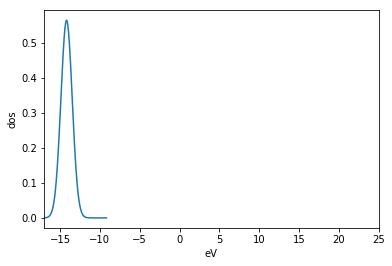

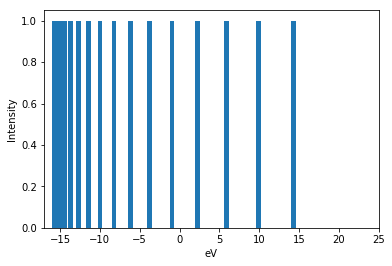

In [3]:
# infinite wire of hydrogen
# modelled by a cell with pbc
# and with plane wave basis set 
# for the electron.

d = 0.9
wire = Atoms('H', positions=[(d/2.1, 0, 0)],
             cell=(d, 0, 0),
             pbc=(1, 1, 1))
wire.center(vacuum=4., axis=(1,2))

calc = GPAW(mode='pw',
           txt=None)
wire.set_calculator(calc)
E = wire.get_potential_energy()


ef = calc.get_fermi_level()

energy, dos = calc.get_dos(spin=0, width=1.)
plot(energy, dos)
xlabel('eV')
ylabel('dos')
xlim([-17., 25.])

figure(20)
bar(eigs, ints, width=.6)
xlim([-17., 25.])
xlabel('eV')
ylabel('Intensity')

### Task 5
a) Write a function that will take a wavelength of a photon in nm and return the energy of the photon in wavenumbers (cm⁻¹) and or in energy (eV).

b) Write a code that will convert the x-unit of a spectrum or diffractogram into another (e.g $2\theta \rightarrow Q$[1/Å] or nm $\rightarrow$ eV, your choice).

### Teacher's comment
The intensity of the absorption spectra is recorded and saved to be plotted and analyzed. If you want to change units on the x-axis, say from energy in eV to wavelength in nm, you have to take some care. Think about it in this way. The area (integral) under the peak or spectra should always add up to the same number. $\int I_{\lambda} d\lambda = \int I_{E} dE $. If we differentiate the conversion of energy formula: $E = hc/\lambda$ we get: $dE = -hc/\lambda^2 d\lambda$. This is the factor you need to multiply the intensity with so that the integral stays correct. $I_{\lambda}= hc/\lambda^2 I_E $

Below we load some NEXAFS data around the C1s K-edge. First we plot the data as it comes Intensity vs eV. We also calculate the integral under the curve. Then we create a vector with the energy values converted into wavelength in nm, and plot the intensity against those values. When one look at the area under this curve it is clear that it is not the same as before. Finally we correct the intensity with the factor given from the differentiation. Even though it is hard to see clearly but the curve is slightly altered and more importantly the area is now the same as in the original data. 

In [4]:
import pandas as pd
import seaborn as sns
sns.set(style='whitegrid')

Integral under Normalized Intensity vs eV:
int IdE = 62.928

Integral under uncorrected Intensity vs nm:
int Idl = 0.858

Integral under corrected Intensity vs nm:
int I_corrdl = 62.928


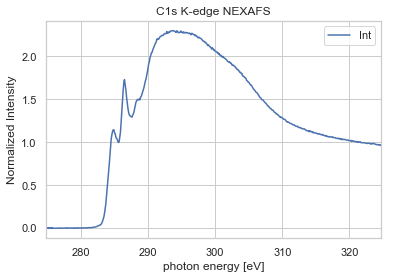

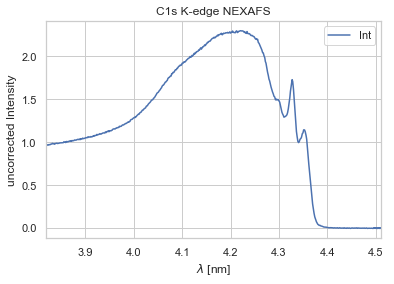

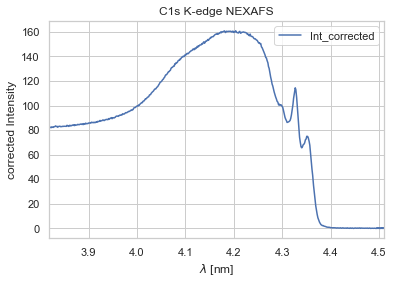

In [5]:
# read some NEXAFS data for C1s K-edge
df = pd.read_csv('xraydata.dat', sep='\t', skiprows=2)

# prepare for eV -> nm conversion
c = 2.99792e8 #speed of light in vacuum
h = 6.62607e-34 # planck constant
e = 1.60217662e-19 # charge of electron.
evtonm = h*c*1.e9/e # l = hc/E

# plot the spectrum
figure(1)
df.plot(x='eV', y='Int')
xlabel('photon energy [eV]')
ylabel('Normalized Intensity')
title('C1s K-edge NEXAFS')

# compute the integral under I(eV) curve
areaev = trapz(df['Int'],df['eV'])
print('Integral under Normalized Intensity vs eV:')
print(f'int IdE = {round(areaev,3)}\n')

# make a new column with nm for each eV value
df['nm'] = evtonm/df.eV

# plot the I(nm) spectrum
figure(2)
df.plot(x='nm', y='Int')
xlabel('$\lambda$ [nm]')
ylabel('uncorrected Intensity')
title('C1s K-edge NEXAFS')

# compute the integral under the uncorrected I(nm) curve
areanm = trapz(-1*df.Int,x=df['nm'])
print('Integral under uncorrected Intensity vs nm:')
print(f'int Idl = {round(areanm, 3)}\n')

#We make new column in df with corrected intensities
df['Int_corrected'] = df.Int*(evtonm/(df.nm**2))

# plot the corrected intensity vs nm spectrum
figure(3)
df.plot(x='nm', y='Int_corrected')
xlabel('$\lambda$ [nm]')
ylabel('corrected Intensity')
title('C1s K-edge NEXAFS')

# compute the integral under the corrected intensity curve
areaInm = trapz(-1*df.Int_corrected,x=df['nm'])
print('Integral under corrected Intensity vs nm:')
print(f'int I_corrdl = {round(areaInm, 3)}')
